## Keras: MLP architectures on MNIST dataset

In [0]:
# If your keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, color=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  print('\n')
  plt.title("Epoch Vs Categorical Cross Entropy Loss")
  fig.canvas.draw()

In [0]:
# The data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)" %(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)" %(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
# Ff you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [58]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [59]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# Data Normalization
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [61]:
# example data point after normlization
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [62]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 1 (a) MLP + ReLU + ADAM with 2 hidden layers

In [0]:
# https://keras.io/activations/
# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
# Some model parameters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [65]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 368)               288880    
_________________________________________________________________
dense_54 (Dense)             (None, 112)               41328     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1130      
Total params: 331,338
Trainable params: 331,338
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2490 - acc: 0.9274 - val_loss: 0.1333 - val_acc: 0.9576
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0956 - acc: 0.9712 - val_loss: 0.0874 - val_acc: 0.9723
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step 

Test score: 0.08830814581377532
Test accuacy: 0.9815




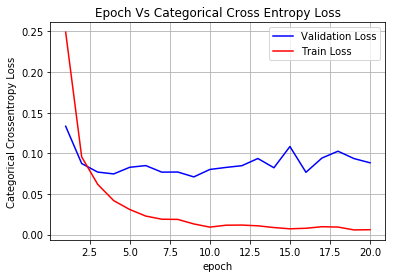

In [66]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_1a= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

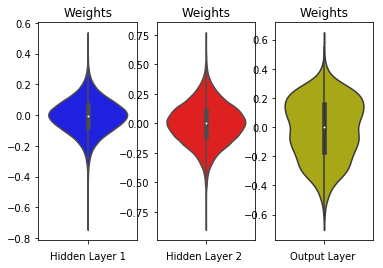

In [67]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 1 (b) MLP + ReLU + ADAM + Batch Normalization with 2 hidden layers

In [68]:
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_30 (Batc (None, 368)               1472      
_________________________________________________________________
dense_57 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_31 (Batc (None, 112)               448       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1130      
Total params: 333,258
Trainable params: 332,298
Non-trainable params: 960
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 

Test score: 0.07494691710416282
Test accuacy: 0.9834




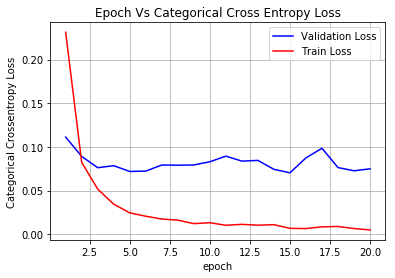

In [69]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_1b= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

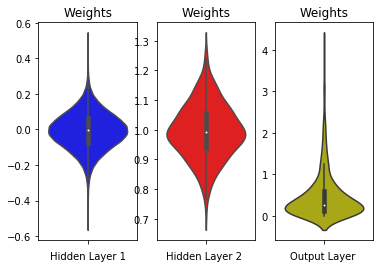

In [70]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 1 (c) MLP + ReLU + ADAM + Batch Normalization + Dropout(0.4) with 2 hidden layers

In [71]:
from keras.layers import Dropout

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_32 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_20 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_33 (Batc (None, 112)               448       
_________________________________________________________________
dropout_21 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                1130      
Total para

Test score: 0.061045588629494885
Test accuacy: 0.9827




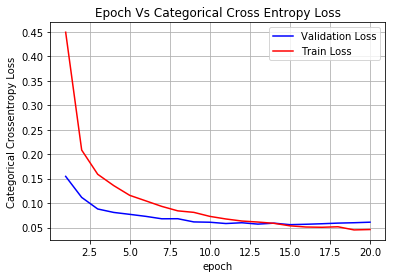

In [72]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_1c= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

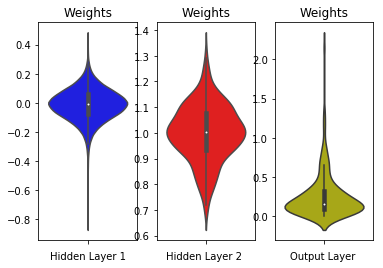

In [73]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 1 (d) MLP + ReLU + ADAM + Batch Normalization + Dropout(0.5) with 2 hidden layers

In [74]:
from keras.layers import Dropout

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_34 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_22 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_35 (Batc (None, 112)               448       
_________________________________________________________________
dropout_23 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)                1130      
Total para

Test score: 0.0585743734298856
Test accuacy: 0.9834




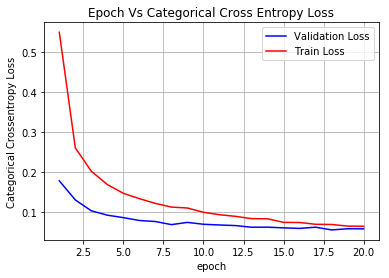

In [75]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_1d= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

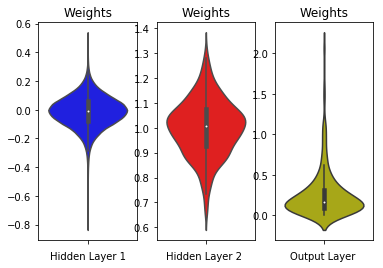

In [76]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 1 (e) MLP + ReLU + ADAM + Batch Normalization + Dropout(0.6) with 2 hidden layers

In [77]:
from keras.layers import Dropout

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_36 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_24 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_37 (Batc (None, 112)               448       
_________________________________________________________________
dropout_25 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 10)                1130      
Total para

Test score: 0.0630017356009921
Test accuacy: 0.9811




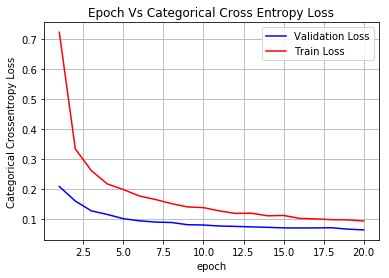

In [78]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_1e= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

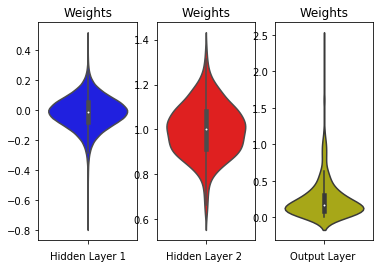

In [79]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2 (a) MLP + ReLU + ADAM with 3 hidden layers

In [80]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 368)               288880    
_________________________________________________________________
dense_69 (Dense)             (None, 112)               41328     
_________________________________________________________________
dense_70 (Dense)             (None, 54)                6102      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                550       
Total params: 336,860
Trainable params: 336,860
Non-trainable params: 0
_________________________________________________________________
None


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2749 - acc: 0.9166 - val_loss: 0.1294 - val_acc: 0.9611
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - l

Test score: 0.09661503153744422
Test accuacy: 0.9791




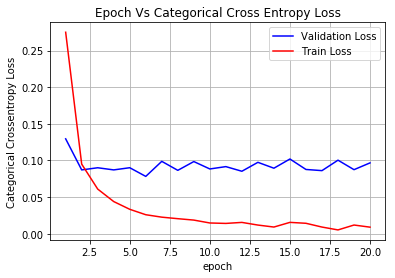

In [81]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_2a= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

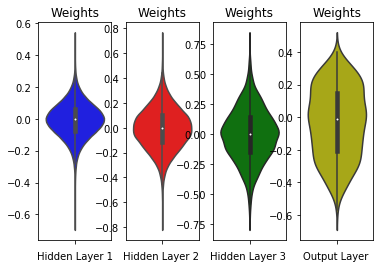

In [82]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2 (b) MLP + ReLU + ADAM + Batch Normalization with 3 hidden layers

In [83]:
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_38 (Batc (None, 368)               1472      
_________________________________________________________________
dense_73 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_39 (Batc (None, 112)               448       
_________________________________________________________________
dense_74 (Dense)             (None, 54)                6102      
_________________________________________________________________
batch_normalization_40 (Batc (None, 54)                216       
_________________________________________________________________
dense_75 (Dense)             (None, 10)                550       
Total para

Test score: 0.09398488705815872
Test accuacy: 0.979




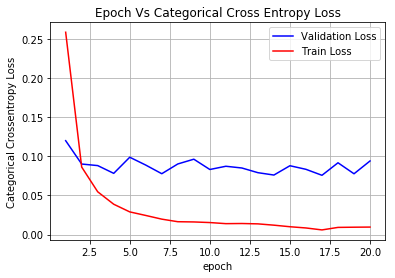

In [84]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_2b= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

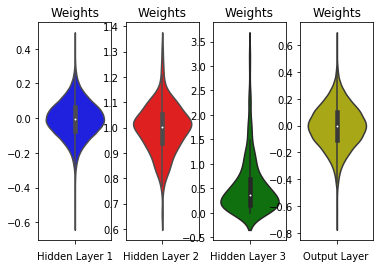

In [85]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2 (c) MLP + ReLU + ADAM + Batch Normalization + Dropout (0.4) with 3 hidden layers

In [86]:
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_41 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_26 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_42 (Batc (None, 112)               448       
_________________________________________________________________
dropout_27 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 54)                6102      
__________

Test score: 0.06336671170063783
Test accuacy: 0.9821




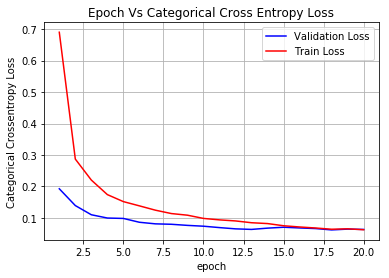

In [87]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_2c= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

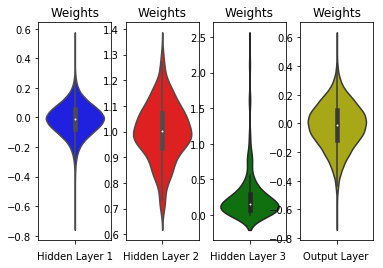

In [88]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2 (d) MLP + ReLU + ADAM + Batch Normalization + Dropout (0.5) with 3 hidden layers

In [89]:
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_44 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_29 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_45 (Batc (None, 112)               448       
_________________________________________________________________
dropout_30 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 54)                6102      
__________

Test score: 0.07416196312536485
Test accuacy: 0.9804




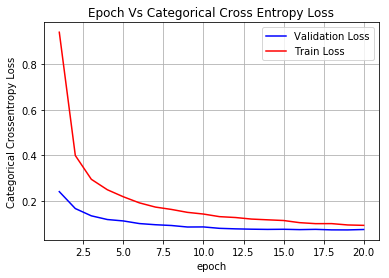

In [90]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_2d= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

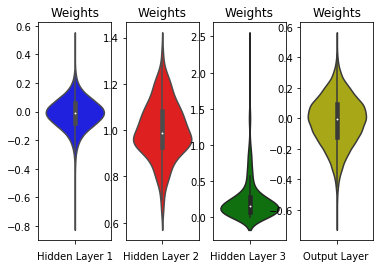

In [91]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2 (e) MLP + ReLU + ADAM + Batch Normalization + Dropout (0.6) with 3 hidden layers

In [92]:
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.073  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.133  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_47 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_32 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_48 (Batc (None, 112)               448       
_________________________________________________________________
dropout_33 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 54)                6102      
__________

Test score: 0.08248090120132547
Test accuacy: 0.9786




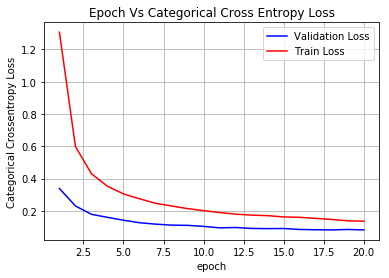

In [93]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_2e= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

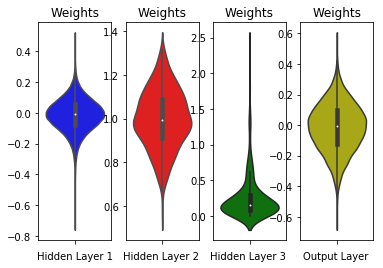

In [94]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 (a) MLP + ReLU + ADAM with 5 hidden layers

In [95]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(Dense(28, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.267, seed=None)))
model_relu.add(Dense(16, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.353, seed=None)))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 368)               288880    
_________________________________________________________________
dense_89 (Dense)             (None, 112)               41328     
_________________________________________________________________
dense_90 (Dense)             (None, 54)                6102      
_________________________________________________________________
dense_91 (Dense)             (None, 28)                1540      
_________________________________________________________________
dense_92 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_93 (Dense)             (None, 10)                170       
Total params: 338,484
Trainable params: 338,484
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.12384451112879369
Test accuacy: 0.9763




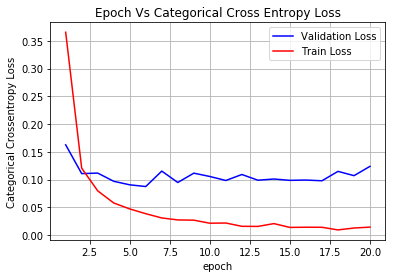

In [96]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_3a= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

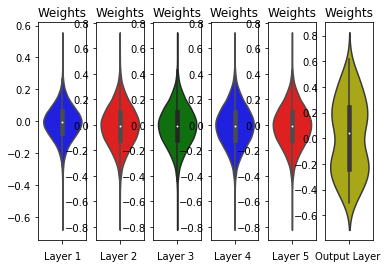

In [97]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='b')
plt.xlabel('Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 (b) MLP + ReLU + ADAM + Batch Normalization with 5 hidden layers

In [98]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(28, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.267, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(16, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.353, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 368)               288880    
_________________________________________________________________
batch_normalization_50 (Batc (None, 368)               1472      
_________________________________________________________________
dense_95 (Dense)             (None, 112)               41328     
_________________________________________________________________
batch_normalization_51 (Batc (None, 112)               448       
_________________________________________________________________
dense_96 (Dense)             (None, 54)                6102      
_________________________________________________________________
batch_normalization_52 (Batc (None, 54)                216       
_________________________________________________________________
dense_97 (Dense)             (None, 28)                1540      
__________

Test score: 0.08531874578401911
Test accuacy: 0.9794




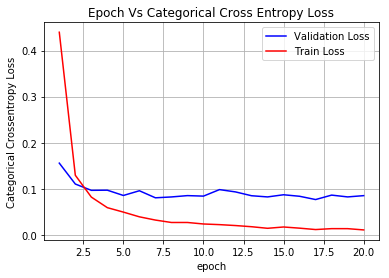

In [99]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_3b= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

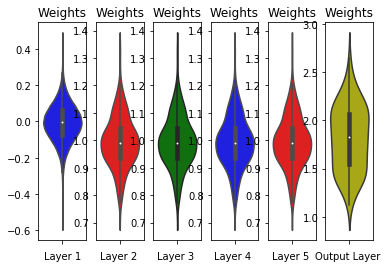

In [100]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='b')
plt.xlabel('Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 (c) MLP + ReLU + ADAM + Batch Normalization + Dropout(0.4) with 5 hidden layers

In [101]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(28, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.267, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(16, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.353, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 368)               288880    
_________________________________________________________________
batch_normalization_55 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_35 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 112)               41328     
_________________________________________________________________
batch_normalization_56 (Batc (None, 112)               448       
_________________________________________________________________
dropout_36 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 54)                6102      
__________

Test score: 0.09595172328427434
Test accuacy: 0.9797




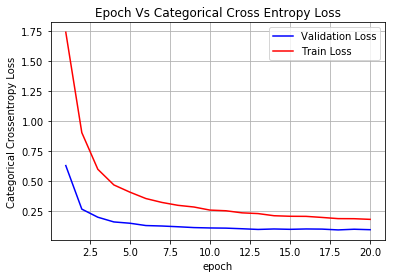

In [102]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_3c= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

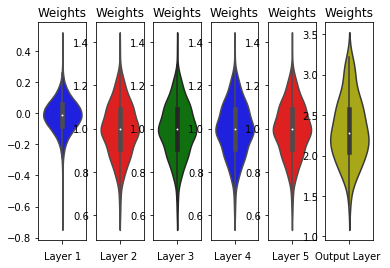

In [103]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='b')
plt.xlabel('Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 (d) MLP + ReLU + ADAM + Batch Normalization + Dropout(0.5) with 5 hidden layers

In [104]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(28, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.267, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(16, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.353, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 368)               288880    
_________________________________________________________________
batch_normalization_60 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_40 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 112)               41328     
_________________________________________________________________
batch_normalization_61 (Batc (None, 112)               448       
_________________________________________________________________
dropout_41 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 54)                6102      
__________

Test score: 0.11384864466506987
Test accuacy: 0.9774




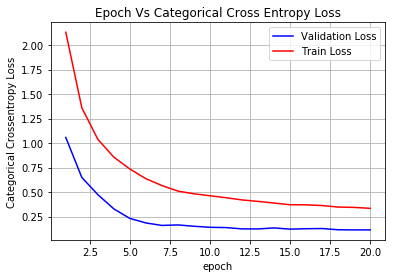

In [105]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_3d= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

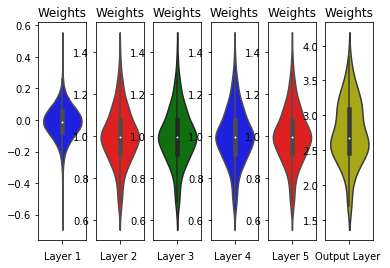

In [106]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='b')
plt.xlabel('Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 (e) MLP + ReLU + ADAM + Batch Normalization + Dropout(0.6) with 5 hidden layers

In [107]:
model_relu = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.073)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.133)

model_relu.add(Dense(368, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.073, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(112, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.133, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(54, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.192, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(28, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.267, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(16, activation='relu',kernel_initializer=RandomNormal(mean =0.0, stddev=0.353, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())
print('\n')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 368)               288880    
_________________________________________________________________
batch_normalization_65 (Batc (None, 368)               1472      
_________________________________________________________________
dropout_45 (Dropout)         (None, 368)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 112)               41328     
_________________________________________________________________
batch_normalization_66 (Batc (None, 112)               448       
_________________________________________________________________
dropout_46 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 54)                6102      
__________

Test score: 0.35688953695297243
Test accuacy: 0.8666




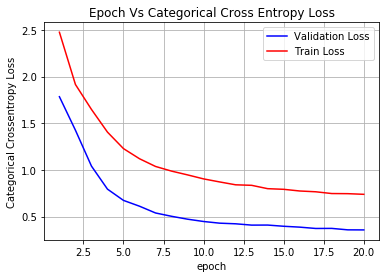

In [108]:
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print ('Test score:', score[0])
print ('Test accuacy:', score[1])

accuracy_3e= score[1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

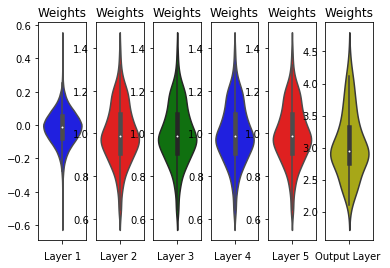

In [109]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='b')
plt.xlabel('Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4 a) Procedure Followed:
STEP 1: Load the MNIST dataset, shuffle the data and split it between train and test.

STEP 2: Normalize the input data and one-hot encode class label data before feeding into the model. This conversion is needed for Multi layer perceptron.

STEP 3: Add the hidden layers and provide the required input parameters like number of neurons for each layer, activation unit, input shape and weight initilization with kernel_initializer.

STEP 4: Compile the model and fit it on training data.

STEP 5: Evaluate the model on test data and plot the error plots for each epoch.

STEP 6: Get the weights from trained model and plot them to see their distribution.

STEP 7: Repeat the steps from 3 to 6 for hidden layers 2, 3, 5 and try the cases with batch normalization and different dropout for each of the architectures.

STEP 8: Summarize the test accuaracy for each model.

## 4 b) Models performance comparision with different architectures

In [110]:
# comparing Models performance using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()

# Name of the models
models =['MLP + ReLU + ADAM with 2 hidden layers                     ',
         'MLP + ReLU + ADAM + Batch Normalization with 2 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.4) with 2 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.5) with 2 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.6) with 2 hidden layers',
        'MLP + ReLU + ADAM with 3 hidden layers                     ',
         'MLP + ReLU + ADAM + Batch Normalization with 3 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.4) with 3 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.5) with 3 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.6) with 3 hidden layers',
        'MLP + ReLU + ADAM with 5 hidden layers                     ',
         'MLP + ReLU + ADAM + Batch Normalization with 5 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.4) with 5 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.5) with 5 hidden layers',
         'MLP + ReLU + ADAM + Batch Normalization + Dropout(0.6) with 5 hidden layers'
        ]

# Test Accuracy
test_accuracy = [accuracy_1a,accuracy_1b,accuracy_1c,accuracy_1d,accuracy_1e,accuracy_2a,accuracy_2b,accuracy_2c,accuracy_2d,accuracy_2e,accuracy_3a,accuracy_3b,accuracy_3c,accuracy_3d,accuracy_3e]
sno = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Adding columns
x.add_column("S.NO.",sno)
x.add_column("MLP MODEL",models)
x.add_column("Test Accuracy" ,test_accuracy )

# Printing the Table
print(x)

+-------+-----------------------------------------------------------------------------+---------------+
| S.NO. |                                  MLP MODEL                                  | Test Accuracy |
+-------+-----------------------------------------------------------------------------+---------------+
|   1   |         MLP + ReLU + ADAM with 2 hidden layers                              |     0.9815    |
|   2   |         MLP + ReLU + ADAM + Batch Normalization with 2 hidden layers        |     0.9834    |
|   3   | MLP + ReLU + ADAM + Batch Normalization + Dropout(0.4) with 2 hidden layers |     0.9827    |
|   4   | MLP + ReLU + ADAM + Batch Normalization + Dropout(0.5) with 2 hidden layers |     0.9834    |
|   5   | MLP + ReLU + ADAM + Batch Normalization + Dropout(0.6) with 2 hidden layers |     0.9811    |
|   6   |         MLP + ReLU + ADAM with 3 hidden layers                              |     0.9791    |
|   7   |         MLP + ReLU + ADAM + Batch Normalization with 3

#### Observation:
1) It is observed that accuracy decreased slightly when dropout is more than 0.5.

2) Accuracy increased when batch normalization and dropout is added to the models.